# Collatzfolgen sind Benford-Verteilt

In [1]:
def collatz(start, verbose=False):
    sequence = []
    if(start == 0):
        raise ValueError
    while(start != 1):
        sequence.append(start)
        if verbose:
            print(start)
        if start % 2 == 0:
            start =  start/2
        else:
            start = start*3+1
    sequence.append(1)
    return sequence
        

In [38]:
data = []
for i in range(1,10*32):
    data += collatz(i)

In [49]:
from benford.benford import frequency_table, chi_squared_passed, delta, chi_squared_statistic, mad2_passed, mad_statistic
import pandas as pd
plt.rcParams['figure.figsize'] = [10, 8]

In [36]:
def barplot(
    table, 
    title = "Vergleich der Häufigkeiten in der Stichprobe zu Benfords Häufigkeiten", 
    sample_name = "sample-data"
    ):
    width = 0.35
    fig, ax = plt.subplots()
    rects1 = ax.bar(
        table.index - width / 2,
        round(table["sample_data"], 2),
        width,
        label=sample_name,
    )
    rects2 = ax.bar(
        table.index + width / 2, round(table["benford"], 2), width, label="benford"
    )
    ax.set_ylabel("Relative Häufigkeit in %", fontdict={"fontsize": 22})
    ax.set_title(
        title,
        fontdict={"fontsize": 22},
    )
    ax.set_xlabel("Ziffer", fontdict={"fontsize": 22})
    ax.set_xticks(table.index)
    ax.set_xticklabels(table.index)
    ax.legend()
    ax.bar_label(rects1, padding=3, rotation=90, fontsize=18)
    ax.bar_label(rects2, padding=3, rotation=90, fontsize=18)
    ax.set_ylim([0, 35])
    fig.tight_layout()
    return fig

def distribution_plot(
    table,
    title = "Vergleich der kumulierten Häufigkeiten", 
    sample_name = "sample-data"
    ):
    t = table.cumsum()
    fig, ax = plt.subplots()
    ax.step(x=t.index, y=t.sample_data, where="post", label=sample_name)
    ax.step(x=t.index, y=t.benford, where="post", label="benford")
    ax.set_ylabel("Kumulierte Häufigkeit", fontdict={"fontsize": 22})
    ax.set_title(title, fontdict={"fontsize": 22})
    ax.set_xlabel("Ziffer", fontdict={"fontsize": 22})
    ax.set_xticks(t.index)
    ax.set_xticklabels(t.index)
    ax.legend()
    ax.set_ylim([0, 105])
    fig.tight_layout()
    return fig

In [4]:
data = []
for i in range(1,10**5):
    data.append((i, collatz(i)))

In [5]:
df = pd.DataFrame(data, columns=['n', 'collatz'])

In [6]:
df['passed'] = df.collatz.apply(chi_squared_passed)

In [7]:
df['size_'] = df.collatz.apply(len)

In [8]:
df['delta'] = df.collatz.apply(frequency_table, args=(1,False)).apply(delta)

In [57]:
df[df.size_ > 50].sort_values('delta')

n  ...     delta
83070  83071  ...  0.004291
66552  66553  ...  0.005115
88736  88737  ...  0.005190
55386  55387  ...  0.006066
83610  83611  ...  0.006120
...      ...  ...       ...
95632  95633  ...  0.101687
78669  78670  ...  0.105331
78660  78661  ...  0.105331
26222  26223  ...  0.105708
52445  52446  ...  0.106071

[88043 rows x 5 columns]

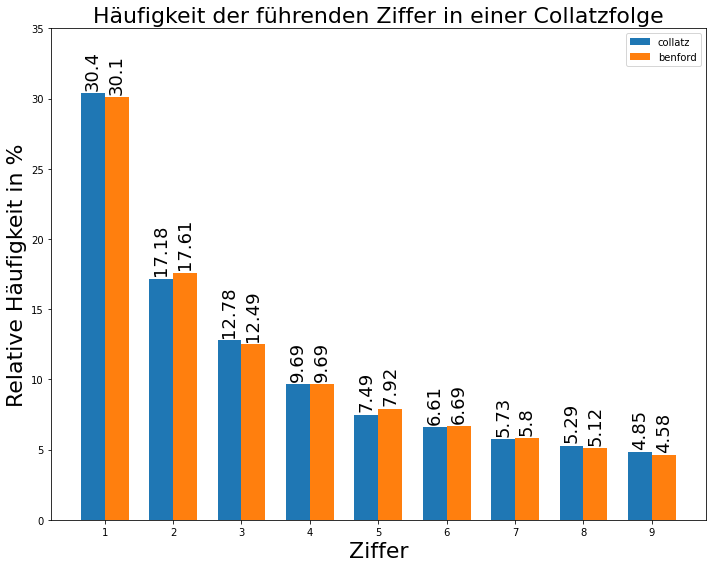

In [38]:
f = barplot(frequency_table(collatz(83071)), 'Häufigkeit der führenden Ziffer in einer Collatzfolge', sample_name='collatz')

In [114]:
frequency_table(collatz(83071)

77

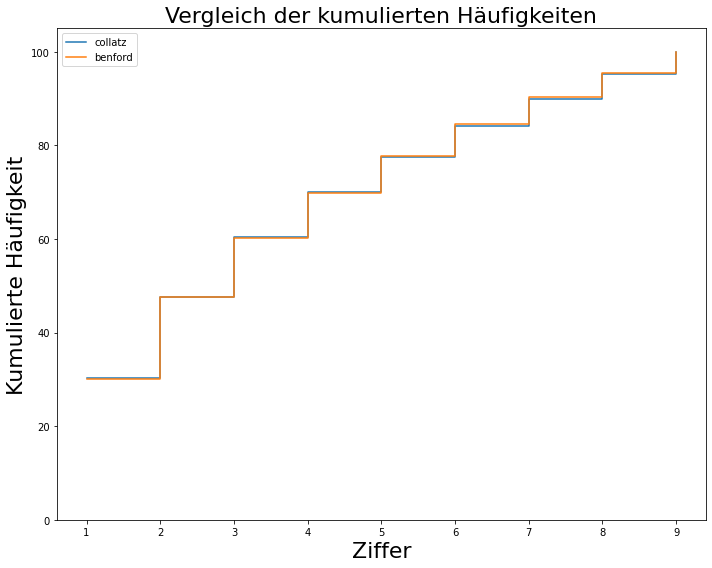

In [43]:
f = distribution_plot(frequency_table(collatz(83071)), sample_name='collatz')

In [44]:
len(collatz(83071))

227

In [45]:
max(collatz(83071))

2838724.0

In [51]:
mad_statistic(collatz(83071))

0.0022593752995933073

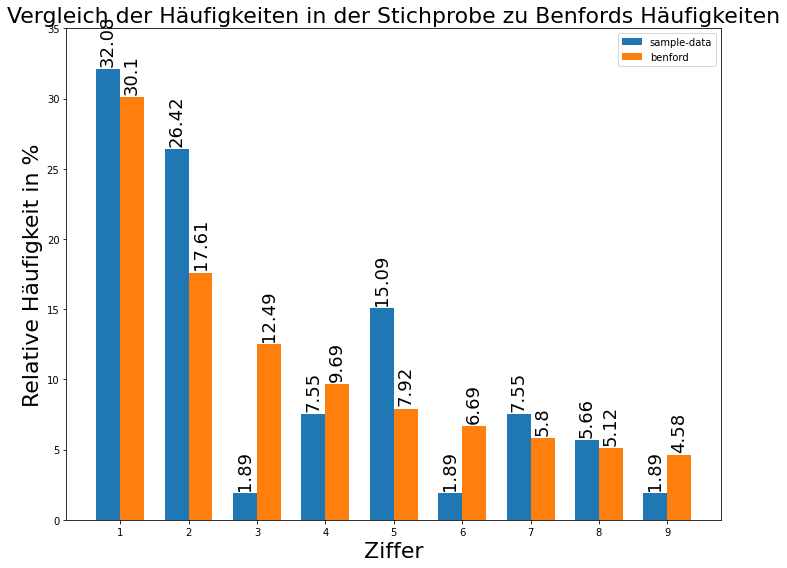

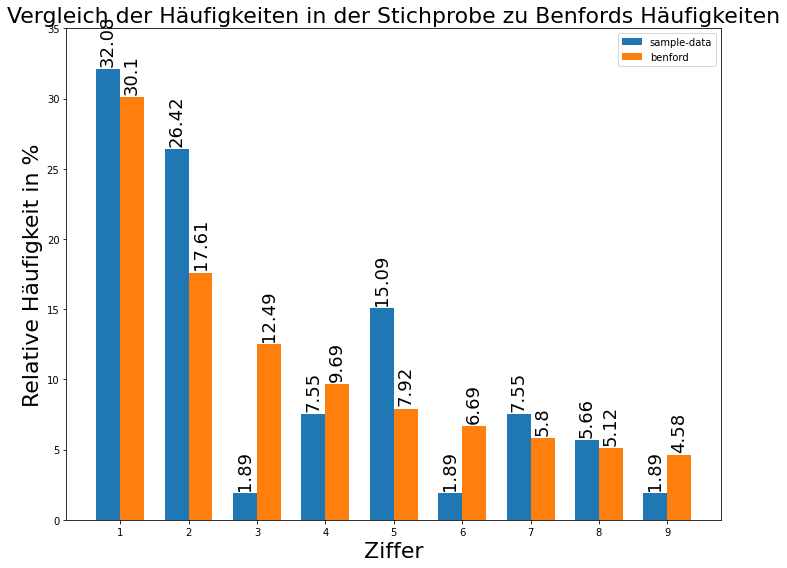

In [55]:
barplot(frequency_table(collatz(52446)))

In [59]:
df.size_.describe()

count    99999.000000
mean       108.538195
std         51.366134
min          1.000000
25%         66.000000
50%        100.000000
75%        147.000000
max        351.000000
Name: size_, dtype: float64

Text(0.5, 1.0, 'Länge von Collatz-Folgen')

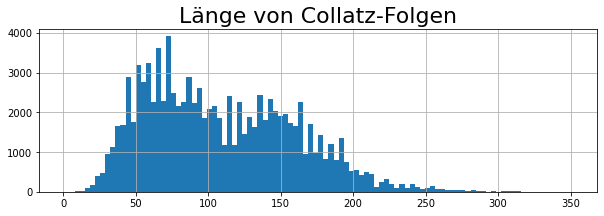

In [66]:
plt.rcParams['figure.figsize'] = [10, 3]
fig = df.size_.hist(bins=100)
fig.set_title('Länge von Collatz-Folgen', fontdict={"fontsize": 22})

In [63]:
fig.set_title('Länge von Collatz-Folgen')

Text(0.5, 1.0, 'Länge von Collatz-Folgen')